<a href="https://colab.research.google.com/github/rahulpandeyrp/sentiment-Analysis/blob/main/Rahul_Assignment_2_NLP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with Consumer Complaint Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [ ]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
lemmatizer = WordNetLemmatizer()
from itertools import chain


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The consumer complaint dataset comprises around 5000 complaints on six products.

In [ ]:
# Read the csv file consumer_complaints.csv
mydata_train =pd.read_csv("consumer_complaints.csv")

In [ ]:
# Print the product groups in the dataset
print(list(mydata_train.Product))

['Credit card or prepaid card', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Vehicle loan or lease', 'Debt collection', 'Debt collection', 'Mortgage', 'Vehicle loan or lease', 'Mortgage', 'Credit card or prepaid card', 'Checking or savings account', 'Credit card or prepaid card', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Student loan', 'Mortgage', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Credit card or prepaid card', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Vehicle loan or lease', 'Student loan', 'Vehicle loan or lease', 'Debt collection', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Student loan', 'Student loan', 'Mortgage', 'Checking or savings account', 'Student loan', 'Vehicle loan or l

In [ ]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Check the length of the data
print(len(mydata_train.Product))
print(len(mydata_train.Consumer_complaint_narrative))


5000
5000


### Expected Output: 
5000

5000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.Consumer_complaint_narrative


In [ ]:
mydata_train

,Product,Consumer_complaint_narrative
0,Credit card or prepaid card,I lost my credit card ( a Chase Sapphire Reser...
1,Mortgage,Having problems finding out LTV from mortgage ...
2,Debt collection,I am a victim of identity theft and this debt ...
3,Debt collection,Yesterday evening I spoke to a rep in regards ...
4,Credit card or prepaid card,I opened a prepaid bank account with REVOLUT i...
...,...,...
4995,Debt collection,"In XX/XX/XXXX, I received a collection letter ..."
4996,Debt collection,"debt incurred with this vehicle is not mine, a..."
4997,Credit card or prepaid card,i made was in line at home depot on XXXX in XX...
4998,Checking or savings account,I opened a Bank of America bank account of XX/...


In [ ]:
text

0       I lost my credit card ( a Chase Sapphire Reser...
1       Having problems finding out LTV from mortgage ...
2       I am a victim of identity theft and this debt ...
3       Yesterday evening I spoke to a rep in regards ...
4       I opened a prepaid bank account with REVOLUT i...
                              ...                        
4995    In XX/XX/XXXX, I received a collection letter ...
4996    debt incurred with this vehicle is not mine, a...
4997    i made was in line at home depot on XXXX in XX...
4998    I opened a Bank of America bank account of XX/...
4999    In the beginning of XXXX I ordered my credit r...
Name: Consumer_complaint_narrative, Length: 5000, dtype: object

In [ ]:
def clean_review(review):
    '''
    This function takes a review and eliminates unnecessary characters 
    from the review in the following order:
    1. Links
    2. Punctuations
    3. Case sensitive words
    4. Stopwords
    5. Stemming
    
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    
  
    review = re.sub(r'http\S+', '', review)
    review = re.sub(r'www.\S+', '', review)
   
    review = review.translate(str.maketrans('', '', string.punctuation))
   
    review = review.lower()
  
    stopword = nltk.corpus.stopwords.words('english')
    review = " ".join([word for word in re.split('\W+', review) if word not in stopword])
   
    wn = nltk.WordNetLemmatizer()
    ps = nltk.PorterStemmer()
    review_cleaned = " ".join([ps.stem(word) for word in re.split('\W+', review)])
    review_cleaned = review_cleaned.split()
    
    return review_cleaned

## Preprocessing the Corpus

In [ ]:
lines = []

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    cleaned_list = clean_review(line)
    lines.append(cleaned_list)

# Calculate the total documents present in the corpus
total_docs = len(text)

# Flattening the 2D list
# Possible other implem
flattened_lines = list(chain.from_iterable(lines))

# Make sure the word_list contains unique tokens
word_list = list(set(flattened_lines))

# Create a dictionary to keep track of index of each word
dict_idx = {}
for num, word in enumerate(word_list):
    dict_idx[word] = num

In [ ]:
len(lines)

5000

In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in flattened_lines:
        try:
            freq_word[word] += 1
        except KeyError:
            freq_word[word] = 1
    
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function



freq_word = frequency_dict(lines)

len(freq_word)

11697

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    total_terms = len(document)
    term_freq_in_document =len([token for token in document if token == word]) #document.count(word)
    
    tf = term_freq_in_document / total_terms
    
    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency
import math
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''

    idf = math.log(len(lines)/freq_word[word]+1)
    
    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(dict_idx),))
    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        tf_idf = tf * idf
        tf_idf_vec[dict_idx[word]] = tf_idf 
    return tf_idf_vec

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tf_idf_table = []

for i in lines:
    tf_idf_table.append(tfidf(i, dict_idx))

len(tf_idf_table)

5000

## Multinomial Naive Bayes (10 Points)

In [ ]:
mydata_train['Product']

0       Credit card or prepaid card
1                          Mortgage
2                   Debt collection
3                   Debt collection
4       Credit card or prepaid card
                   ...             
4995                Debt collection
4996                Debt collection
4997    Credit card or prepaid card
4998    Checking or savings account
4999                Debt collection
Name: Product, Length: 5000, dtype: object

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(mydata_train['Product'])
label

array([1, 3, 2, ..., 1, 0, 2])

In [ ]:
minMaxScaler = preprocessing.MinMaxScaler()
minMaxScaler.fit(tf_idf_table)
X_train = minMaxScaler.transform(tf_idf_table)

In [ ]:
#X_train = tf_idf_table
y_train = label


In [ ]:
y_train

array([1, 3, 2, ..., 1, 0, 2])

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


pred =  model.predict(X_train)


#Fit a Multinomial Naive Bayes Model on our dataset


In [ ]:
#Perform testing on the train dataset

pred =  model.predict(X_train)

In [ ]:
#Calculate the F1 Score and the Accuracy

from sklearn.metrics import accuracy_score, f1_score
F1_score = f1_score(y_train, pred, average='micro')
Accuracy = accuracy_score(y_train, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.8755999999999999
Accuracy:  0.8756


### Expected Output:
F1 Score: 0.8081311697005633

Accuracy: 0.826

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
#install libraries
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
categories = {
    "Bank": ["European Central Bank", "Bank", "Financial technology"],
    "Countries": ["Russia","United States","Ukraine"],
    "sports": ["Swimming", "Tennis", "Football"],
    "A.I": ["Natural language processing", "Machine learning", "Quantum machine learning"]
}

topics = []
for cat in categories:
    topics.append([cat, categories[cat]])

# selected topics
#topics = ["European Central Bank", "Bank", "Financial technology","Swimming", "Tennis", "Football", "Russia","United States","kraine"]

# list of articles to be downloaded
articles = []
for i in topics:
  articles.append(wikipedia.search(i)[:8])
#customer_data[1].remove(customer_data[1][2])



In [ ]:
# download and store articles (summaries) in this variable
data = []
counter = []
count = 0
for article in articles:
    for i in article:
      try:
        data.append(wikipedia.summary(i))
        counter.append(count)
      except WikipediaException:
        continue
     
    count += 1
print(counter)

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** As the data is raw text format we are choosing to clean data.By cleaning data we are getting better clustering of topics as it makes grouping easy for tsne technique.

In [ ]:
# You can use Assignment 1's clean message function

import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('omw-1.4')

def clean_message(message):
    # first of all we will lower the text so that there is no discrepencay
    lower_review = message.lower()
    # removing the punctuation 
    lower_review_removed ="".join([temp for temp in lower_review if temp not in string.punctuation])
    # splitting the cleaned
    words_list = re.split(' ', lower_review_removed)
    words = [lemmatizer.lemmatize(word) for word in words_list if word not in set(stopwords.words('english'))]
    lower_review_removed_lem = ' '.join(words) 

    return lower_review_removed_lem



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
cleaned_data = []
for i in data:
    cleaned_data.append(clean_message(i))

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
count_wm = countvectorizer.fit_transform(cleaned_data)
tfidf_wm = tfidfvectorizer.fit_transform(cleaned_data)
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(), columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(), columns = tfidf_tokens)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#print(X.shape)
df_tfidfvect.shape, df_countvect.shape

((30, 1439), (30, 1523))

### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_tfidfvect)

print(tsne_results)


[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.382027
[t-SNE] KL divergence after 300 iterations: 0.558270
[[ -16.8748     -111.858406  ]
 [  26.75284    -122.51759   ]
 [ 121.22121     -29.560415  ]
 [  65.28616     -55.792255  ]
 [  17.968807    -61.985126  ]
 [ -21.891916    -69.67843   ]
 [   0.79922307  -22.212666  ]
 [ -81.1124      -43.268333  ]
 [ -27.198223     46.969353  ]
 [  42.639126    111.17477   ]
 [  59.362827    149.6509    ]
 [  58.802414     67.82025   ]
 [  45.83095      20.951735  ]
 [  30.050838   -179.04477   ]
 [  -2.8794165    90.53407   ]
 [ -46.36904     102.26781   ]
 [ -36.18632       4.4799457 ]
 [ -74.832436     18.934916  ]
 [  18.216934     56.072136  ]
 [ -73.0804       62.4949    ]
 [  81

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Plot and annotate the points with different markers for different expected groups.

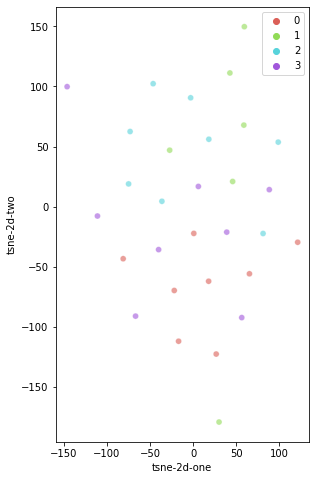

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# get a figure handle
df_tfidfvect['tsne-2d-one'] = tsne_results[:,0]
df_tfidfvect['tsne-2d-two'] = tsne_results[:,1]
df_tfidfvect["y"] = counter
plt.subplots(figsize=(10,8))
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df_tfidfvect.y.tolist(),
    palette=sns.color_palette("hls", 4),
    data=df_tfidfvect,
    legend="full",
    alpha=0.6
)


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):** We can clearly see that there is good clustering of topics but the intra cluster relations are not very adhesive.This could be due to different topics being choosen in a category.There is a degree of randomness in our clustering.

For example the category 3 points are well spread through out but they have small clusters present within that spread.
  


# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
# Import the data.csv only use 'text' and 'target' columns
data =pd.read_csv("data.csv")
data=data[["text","target"]]
# data

#data=pd.DataFrame(data)
text=data.text
target=data.target
# and printout the train.shape and validation.shape 

# expected shape of dataset is (7613, 2)
data.shape

(7613, 2)

In [ ]:
# clean the text in the dataframe using the clean_text function provided above

lines = []
for line in text:
    
    cleaned_list = clean_text(line)
    lines.append(cleaned_list)

In [ ]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

# fit and transform on dataset
count_wm = count_vectorizer.fit_transform(lines).toarray()


In [ ]:
X=count_wm

In [ ]:
# get the values of target column

y = target

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
  model = tf.keras.models.Sequential()
  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 64 units and relu activation
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))

  # layer 3 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))
  
  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(units=32, activation='tanh', activity_regularizer=tf.keras.regularizers.L2()))

  # layer 5 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(units=16, activation='tanh', activity_regularizer=tf.keras.regularizers.L2()))

  # layer 7 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 8 : output layer with units equal to 1 and activation as sigmoid
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.AUC()])

  return model



Epoch 1/5
381/381 [==============================] - 9s 20ms/step - loss: 0.6097 - auc: 0.7375 - val_loss: 0.5995 - val_auc: 0.7313
Epoch 2/5
381/381 [==============================] - 7s 18ms/step - loss: 0.4677 - auc: 0.8730 - val_loss: 0.6191 - val_auc: 0.7278
Epoch 3/5
381/381 [==============================] - 7s 18ms/step - loss: 0.3984 - auc: 0.9115 - val_loss: 0.6374 - val_auc: 0.7229
Epoch 4/5
381/381 [==============================] - 6s 17ms/step - loss: 0.3527 - auc: 0.9344 - val_loss: 0.6725 - val_auc: 0.7112
Epoch 5/5
381/381 [==============================] - 6s 16ms/step - loss: 0.3146 - auc: 0.9480 - val_loss: 0.7024 - val_auc: 0.7001
Epoch 1/5
381/381 [==============================] - 10s 23ms/step - loss: 0.5851 - auc_1: 0.7720 - val_loss: 0.6360 - val_auc_1: 0.6957
Epoch 2/5
381/381 [==============================] - 6s 17ms/step - loss: 0.4308 - auc_1: 0.8944 - val_loss: 0.7244 - val_auc_1: 0.6744
Epoch 3/5
381/381 [==============================] - 6s 17ms/step -

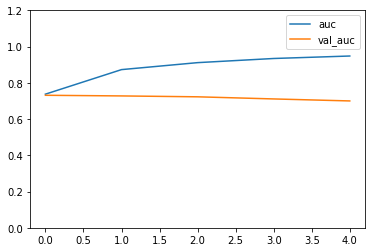

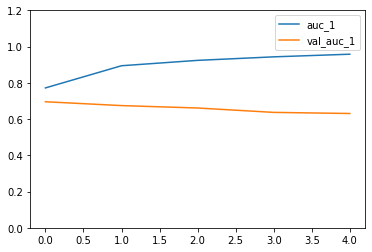

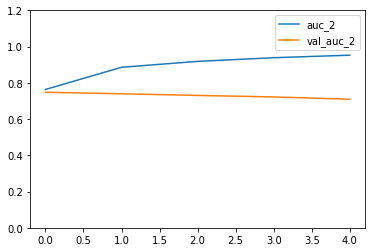

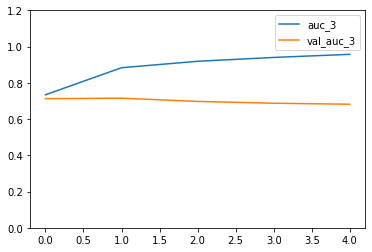

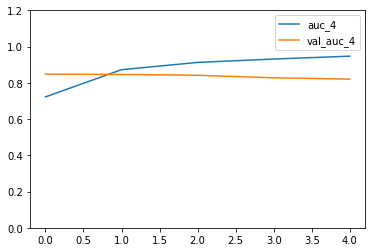

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5

skf = StratifiedKFold(n_splits=5)

# Now Split the countvectors and target (y)
splits = skf.split(X, y)

# iterate through the train and valid index in splits for 5 folds
for train_index, test_index in splits:                          #skf.split(df, target):
  # Get X_train, X_valid, y_train, y_valid using indexes
  X_train, X_valid = X[train_index], X[test_index]
  y_train, y_valid = y[train_index], y[test_index]
  
  #call the build_model function and initialize the model
  model = build_model(X_train)

  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
  history=model.fit(X_train,y_train,
            validation_data=(X_valid,y_valid),
            batch_size=16,
            epochs=5
            )


# plot the graph between training auc and validation auc
  para = pd.DataFrame(model.history.history)
#auc_cols = [col for col in model_params.columns if 'auc' in col]
  para.iloc[:, np.r_[1,3]].plot(ylim=[0,1.2]);



### Q) Comment on the plots. How did it varied across different folds for neural networks?

The auc of roc is increasing at every fold.

# Building Multinomial Navie Bayes on Countvectors

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for train_index, test_index in splits:                         
  # Get X_train, X_valid, y_train, y_valid using indexes
  X_train, X_valid = X[train_index], X[test_index]
  y_train, y_valid = y[train_index], y[test_index]
  





# intialise multinomial navie bayes with default parameters
model = MultinomialNB()
 
# fit the data
model.fit(X_train, y_train)

pred =  model.predict(X_valid)
# plot AUC-ROC curve for validation data


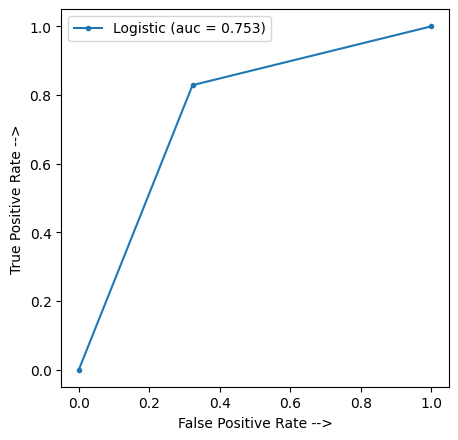

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_valid, pred)
auc_logistic = auc(fpr, tpr)



plt.figure(figsize=(5, 5), dpi=100)

plt.plot(fpr,tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?


The auc for the curve is 0.753.It will more less renmain th same as we have used startified

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**  Glove and word2vec are  models that depend on word vectors by using the information from the generated vaules of occurrence and co-occurrence.

TF-IDF is used where we need to evaluate and decide on article topics. This is accomplished by the words that are used. Words are assigned weight by using the the context in which they are used.In TH-IDF the relevance is an important factor.

Count vectorizer is just frequency of each word in given document. Therefore, this can only measure the occurrences of a given word and not the importance.
Tf-idf generates a score, whereas Word2vec generates one vector for each word. Word2vec is excellent for digging deeper into our documents and aids in locating content and content subsets. Each word's context is represented by its vectors.

Sparse matrix is generated by Count Vectorization and TF-IDF which can be hard/ redundant while training a model; whereas word2vec and Glove generates a specifc vector of a word which has a meaning and less sparse as well.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**A probabilistic classifier , Naive Bayes, makes the assumption that every variable has the same distribution and is independent of every other variable. It is crucial to translate the words into a numerical representation before applying natural language processing techniques to a batch of data. The two feature extraction techniques are Bag of Words (BoW) and TF-IDF, and this procedure is known as feature extraction. The numerical vector's density or sparsity is the primary distinction between BoW and TF-IDF. For each news article in the BoW format, a vector is constructed, and if a word is present, a 1 is added to the vector; if not, a 0 is added. Considering that a binary representation is being used, this may result in a sparsely populated matrix.